# diabetes prediction using machine learning :

In [2]:
import pandas as pd #read the dataset
import numpy as np #numerical python
import matplotlib.pyplot as plt #Plot the Graph
import seaborn as sns 

In [3]:
#read the dataset
df = pd.read_csv("B:/documents/personal documents/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape


(768, 9)

In [6]:
df.tail(9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df['DiabetesPedigreeFunction']

0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: DiabetesPedigreeFunction, Length: 768, dtype: float64

In [11]:
df['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [12]:
df.isnull().sum

<bound method DataFrame.sum of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                   

In [13]:
# The names of the features
print("The names of the features :\n", list(df.columns))

The names of the features :
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [14]:
df['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [15]:
df = df.drop_duplicates()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Train and Test :

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = df.iloc[:,df.columns!='Outcome'] 
y = df.iloc[:,df.columns=='Outcome']

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

# Data Visualization :

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

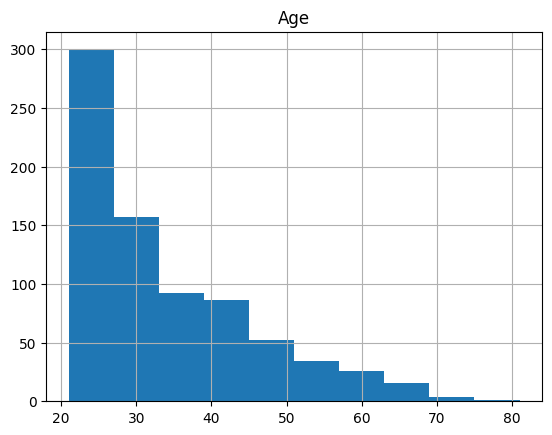

In [19]:
df.hist(column='Age')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

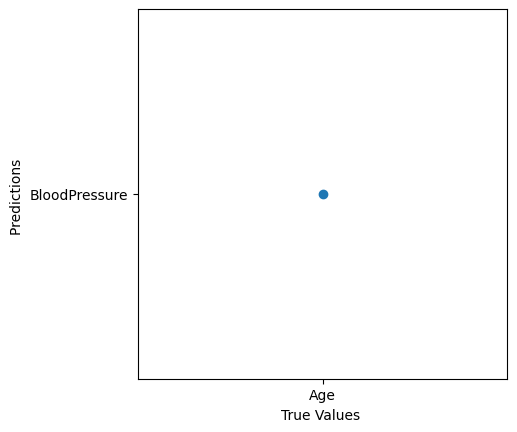

In [20]:
g=plt.scatter('Age', 'BloodPressure')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

C:\Users\admin\AppData\Local\Temp\ipykernel_15372\1244122692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SkinThickness'])


<Axes: xlabel='SkinThickness', ylabel='Density'>

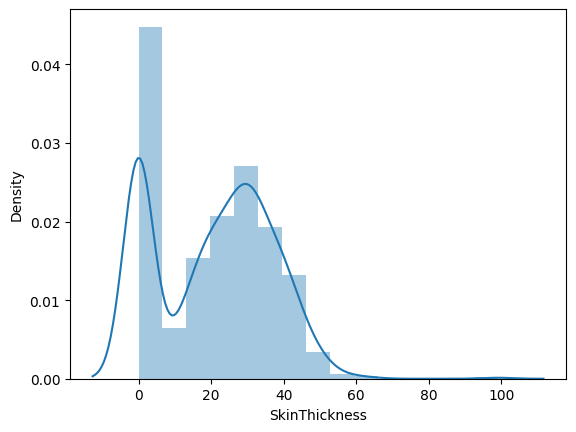

In [21]:
sns.distplot(df['SkinThickness'])

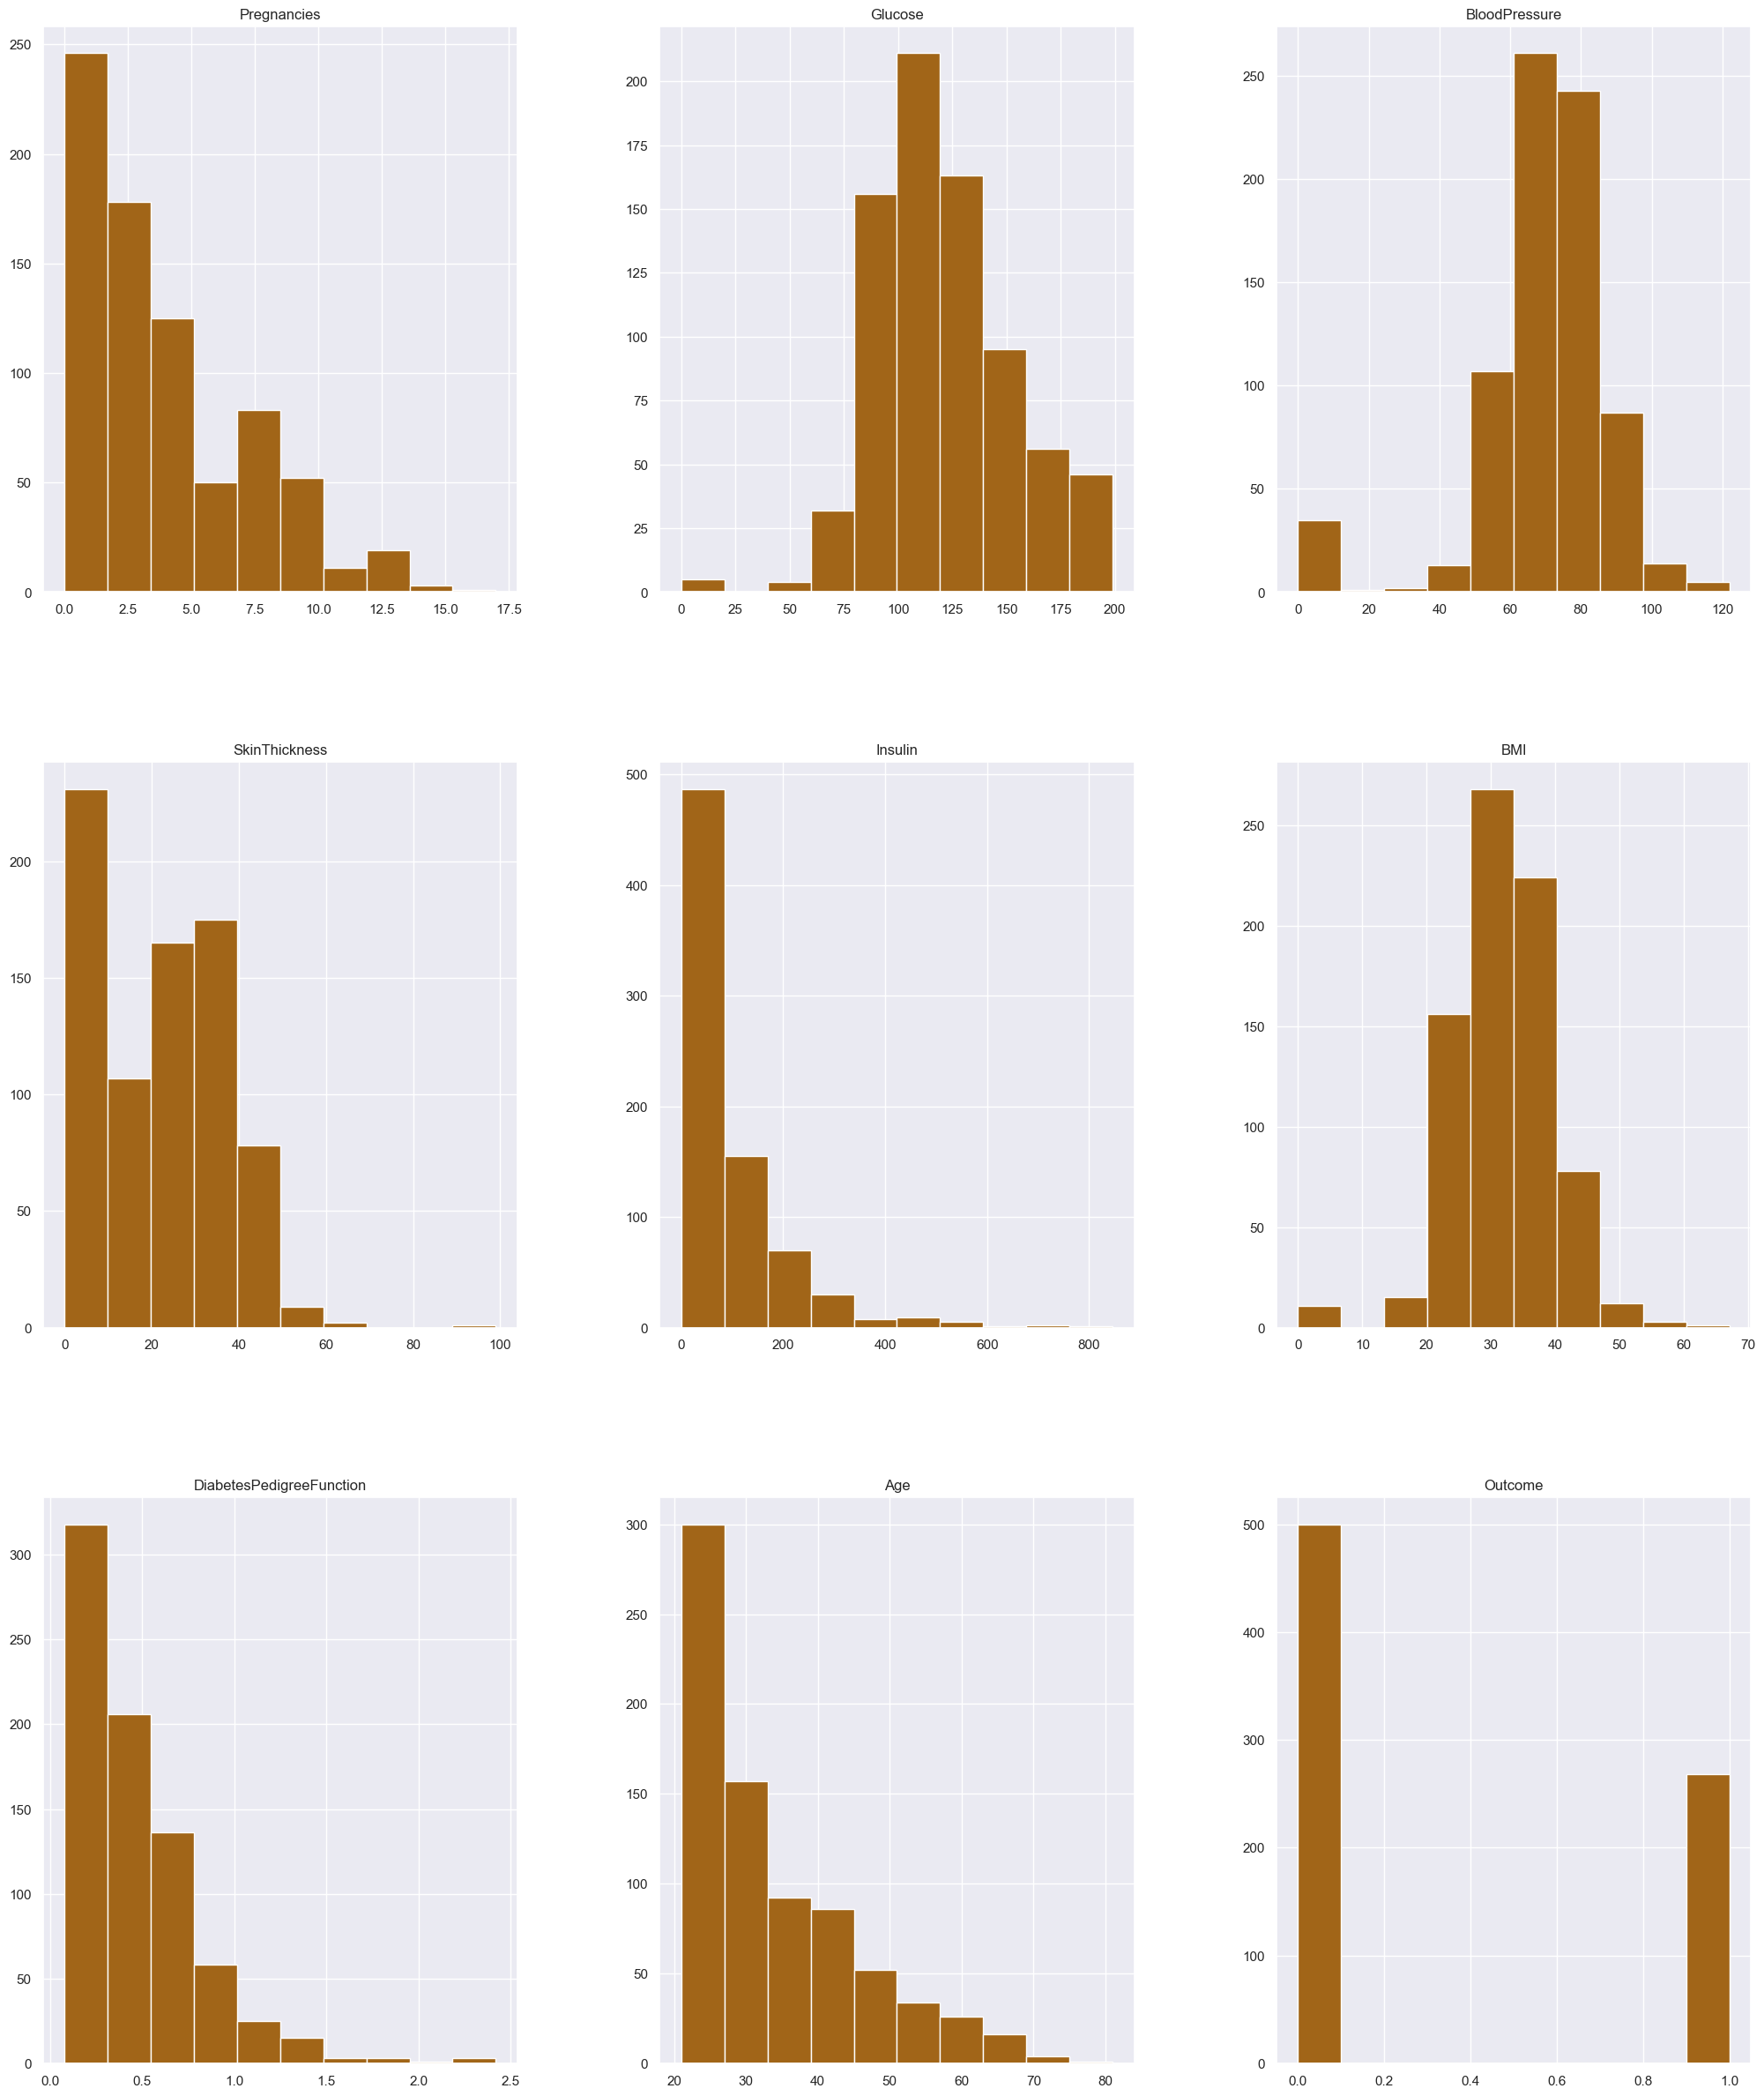

In [22]:
sns.set(palette='BrBG')
df.hist(figsize=(25,30));

In [23]:
from sklearn.metrics import classification_report , confusion_matrix

# Algorithm -1 :

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model1 = RandomForestClassifier()

In [26]:
model1.fit(xtrain,ytrain.values.ravel())

RandomForestClassifier()

In [27]:
predict_output1 = model1.predict(xtest) #to test the alg
print(predict_output1)

[0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 1 0 1 0 1]


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
acc=accuracy_score(predict_output1,ytest)
print('The accuracy score for RF:',acc)

The accuracy score for RF: 0.7012987012987013


In [30]:
cm1 = np.array(confusion_matrix(ytest, predict_output1, labels=[1,0]))
confusion1 = pd.DataFrame(cm1, index=['is diabetes affected', 'is diabetes Normal'],columns=['predicted diabetes affected','predicted diabetes normal'])
confusion1

,predicted diabetes affected,predicted diabetes normal
is diabetes affected,26,28
is diabetes Normal,18,82


<Axes: >

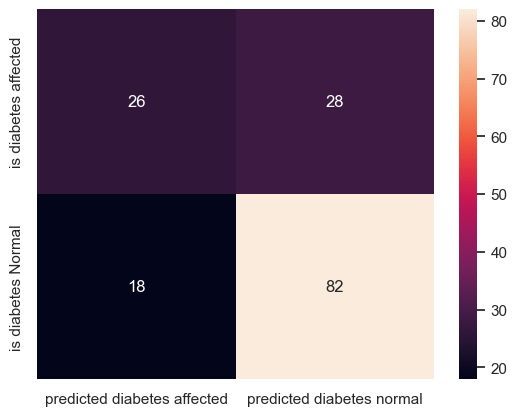

In [31]:
sns.heatmap(confusion1, annot=True)

In [32]:
print(classification_report(ytest, predict_output1))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154



# Algorithm -2 :

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model2=DecisionTreeClassifier()

In [35]:
model2.fit(xtrain,ytrain.values.ravel())

DecisionTreeClassifier()

In [36]:
predict_output2 = model2.predict(xtest) #to test the alg
print(predict_output2)

[0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 1]


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
acc2=accuracy_score(predict_output2,ytest)
print('The accuracy score for DecisionTreeClassifier:',acc2)

The accuracy score for DecisionTreeClassifier: 0.6363636363636364


In [39]:
cm2 = np.array(confusion_matrix(ytest, predict_output2, labels=[1,0]))
confusion2 = pd.DataFrame(cm2, index=['is diabetes affected', 'is diabetes Normal'],columns=['predicted diabetes affected','predicted diabetes normal'])
confusion2

,predicted diabetes affected,predicted diabetes normal
is diabetes affected,24,30
is diabetes Normal,26,74


<Axes: >

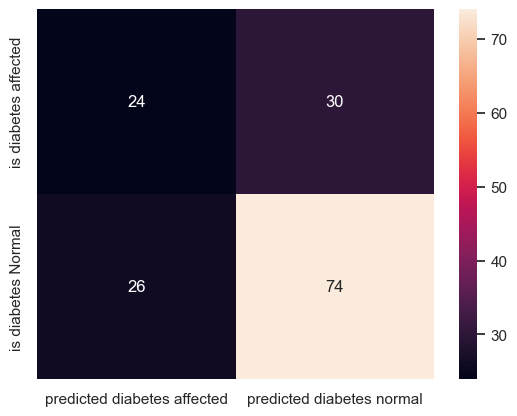

In [40]:
sns.heatmap(confusion2, annot=True)

In [41]:
print(classification_report(ytest, predict_output2))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       100
           1       0.48      0.44      0.46        54

    accuracy                           0.64       154
   macro avg       0.60      0.59      0.59       154
weighted avg       0.63      0.64      0.63       154



# Algorithm -3 :

In [42]:
from sklearn.svm import SVC

In [43]:
model3=SVC()

In [44]:
model3.fit(xtrain,ytrain.values.ravel())

SVC()

In [45]:
predict_output3 = model3.predict(xtest) #to test the alg
print(predict_output3)

[0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 1]


In [46]:
from sklearn.metrics import accuracy_score

In [47]:
acc3=accuracy_score(predict_output3,ytest)
print('The accuracy score for SVC:',acc3)

The accuracy score for SVC: 0.7337662337662337


In [48]:
cm3 = np.array(confusion_matrix(ytest, predict_output3, labels=[1,0]))
confusion3 = pd.DataFrame(cm3, index=['is diabetes affected', 'is diabetes Normal'],columns=['predicted diabetes affected','predicted diabetes normal'])
confusion3

,predicted diabetes affected,predicted diabetes normal
is diabetes affected,24,30
is diabetes Normal,11,89


<Axes: >

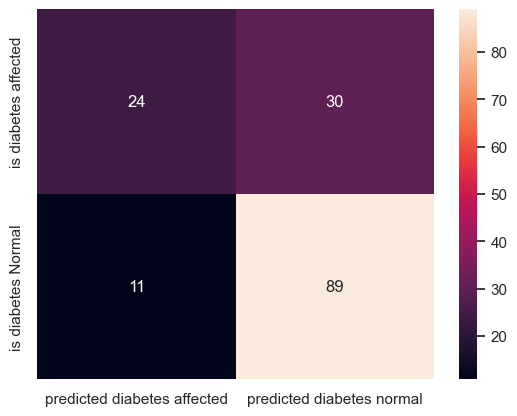

In [49]:
sns.heatmap(confusion3, annot=True)

In [50]:
print(classification_report(ytest, predict_output3))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       100
           1       0.69      0.44      0.54        54

    accuracy                           0.73       154
   macro avg       0.72      0.67      0.68       154
weighted avg       0.73      0.73      0.72       154



# Algorithm -4 :

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model4=LogisticRegression()

In [53]:
model4.fit(xtrain,ytrain.values.ravel())

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
predict_output4 = model4.predict(xtest) #to test the alg
print(predict_output4)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 1 0 1]


In [55]:
from sklearn.metrics import accuracy_score

In [56]:
acc4=accuracy_score(predict_output4,ytest)
print('The accuracy score for LogisticRegression:',acc4)

The accuracy score for LogisticRegression: 0.7662337662337663


In [57]:
cm4 = np.array(confusion_matrix(ytest, predict_output4, labels=[1,0]))
confusion4 = pd.DataFrame(cm4, index=['is diabetes affected', 'is diabetes Normal'],columns=['predicted diabetes affected','predicted diabetes normal'])
confusion4

,predicted diabetes affected,predicted diabetes normal
is diabetes affected,29,25
is diabetes Normal,11,89


<Axes: >

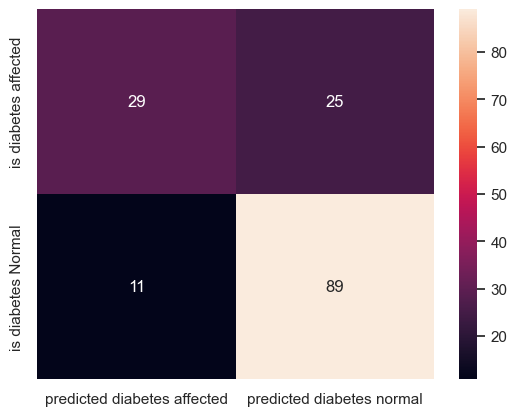

In [58]:
sns.heatmap(confusion4, annot=True)

In [59]:
print(classification_report(ytest, predict_output4))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       100
           1       0.72      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



# Algorithm - 5 :

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
model5=GradientBoostingClassifier()

In [62]:
model5.fit(xtrain,ytrain.values.ravel())

GradientBoostingClassifier()

In [63]:
predict_output5 = model5.predict(xtest) #to test the alg
print(predict_output5)

[0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0
 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1
 0 1 0 1 1 1]


In [64]:
from sklearn.metrics import accuracy_score

In [65]:
acc5=accuracy_score(predict_output5,ytest)
print('The accuracy score for GradientBoostingClassifier:',acc5)

The accuracy score for GradientBoostingClassifier: 0.7337662337662337


In [66]:
cm5 = np.array(confusion_matrix(ytest, predict_output5, labels=[1,0]))
confusion5 = pd.DataFrame(cm5, index=['is diabetes affected', 'is diabetes Normal'],columns=['predicted diabetes affected','predicted diabetes normal'])
confusion5

,predicted diabetes affected,predicted diabetes normal
is diabetes affected,32,22
is diabetes Normal,19,81


<Axes: >

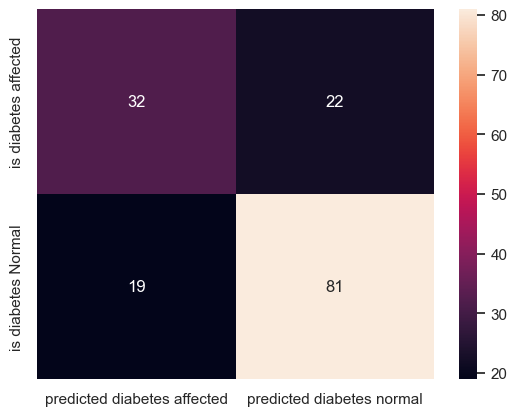

In [67]:
sns.heatmap(confusion5, annot=True)

In [68]:
print(classification_report(ytest, predict_output5))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



# Algorithm - 6 :

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
model6=GaussianNB()

In [71]:
model6.fit(xtrain,ytrain.values.ravel())

GaussianNB()

In [72]:
predict_output6 = model6.predict(xtest) #to test the alg
print(predict_output6)

[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0
 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 1 0 1]


In [73]:
from sklearn.metrics import accuracy_score

In [74]:
acc6=accuracy_score(predict_output6,ytest)
print('The accuracy score for GaussianNB:',acc6)

The accuracy score for GaussianNB: 0.7337662337662337


In [75]:
cm6 = np.array(confusion_matrix(ytest, predict_output6, labels=[1,0]))
confusion6 = pd.DataFrame(cm6, index=['is diabetes affected', 'is diabetes Normal'],columns=['predicted diabetes affected','predicted diabetes normal'])
confusion6

,predicted diabetes affected,predicted diabetes normal
is diabetes affected,32,22
is diabetes Normal,19,81


<Axes: >

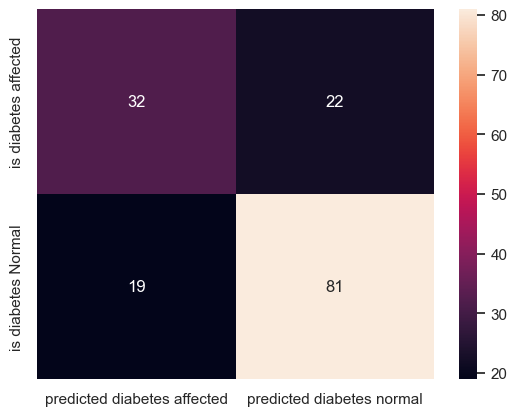

In [76]:
sns.heatmap(confusion6, annot=True)

In [77]:
print(classification_report(ytest, predict_output6))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



# Algorithm - 7 :

In [78]:

from sklearn.neighbors import KNeighborsClassifier

In [79]:
model7=KNeighborsClassifier()

In [80]:
model7.fit(xtrain,ytrain.values.ravel())

KNeighborsClassifier()

In [81]:
predict_output7 = model7.predict(xtest) #to test the alg
print(predict_output7)

[0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0
 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1
 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 1 1 1 0 1]


In [82]:
from sklearn.metrics import accuracy_score

In [83]:
acc7=accuracy_score(predict_output7,ytest)
print('The accuracy score for KNeighborsClassifier:',acc7)

The accuracy score for KNeighborsClassifier: 0.6883116883116883


In [84]:
cm7 = np.array(confusion_matrix(ytest, predict_output7, labels=[1,0]))
confusion7 = pd.DataFrame(cm7, index=['is diabetes affected', 'is diabetes Normal'],columns=['predicted diabetes affected','predicted diabetes normal'])
confusion7

,predicted diabetes affected,predicted diabetes normal
is diabetes affected,28,26
is diabetes Normal,22,78


<Axes: >

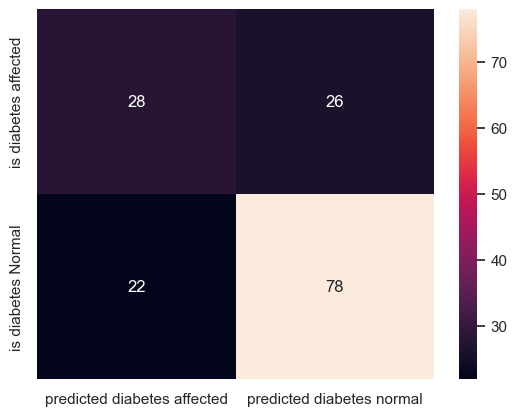

In [85]:
sns.heatmap(confusion7, annot=True)

In [86]:
print(classification_report(ytest, predict_output7))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       100
           1       0.56      0.52      0.54        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154



# -----  END  -----